# DCAT JSON Structure and Harvesting Sample Walkthrough Guide

- This guide will assist users in deconstructing the Data Catalog Vocabulary in JavaScript Object Notation (DCAT JSON) file structure and Application Programming Interface (API) design and how they are created through harvesting from selected portals.  
- A simple harvest sample will be presented to simulate the larger process and understand how the harvesting-metadata workflow is done.

## DCAT JSON File Structure and API Breakdown

### The following is a description of DCAT API and screenshots of the stcture of DCAT JSON pertaining to metadata harvesting: 

- DCAT enables a publisher to describe datasets and data services in a catalog using a standard model and vocabulary that facilitates the consumption and aggregation of metadata from multiple catalogs. This can increase the discoverability of datasets and data services. It also makes it possible to have a decentralized approach to publishing data catalogs and makes federated search for datasets across catalogs in multiple sites possible using the same query mechanism and structure. Aggregated DCAT metadata can serve as a manifest file as part of the digital preservation process.

# The following screenshots exemplify the structure of a DCAT JSON and then how it is generated for harvesting metadata purposes. 

## This is the Raw JSON Data dictionary format breakdown for how data is compiled by web notation headers and other indicators in the BTAA format denoted by the harvest.py script for metadata purposes.
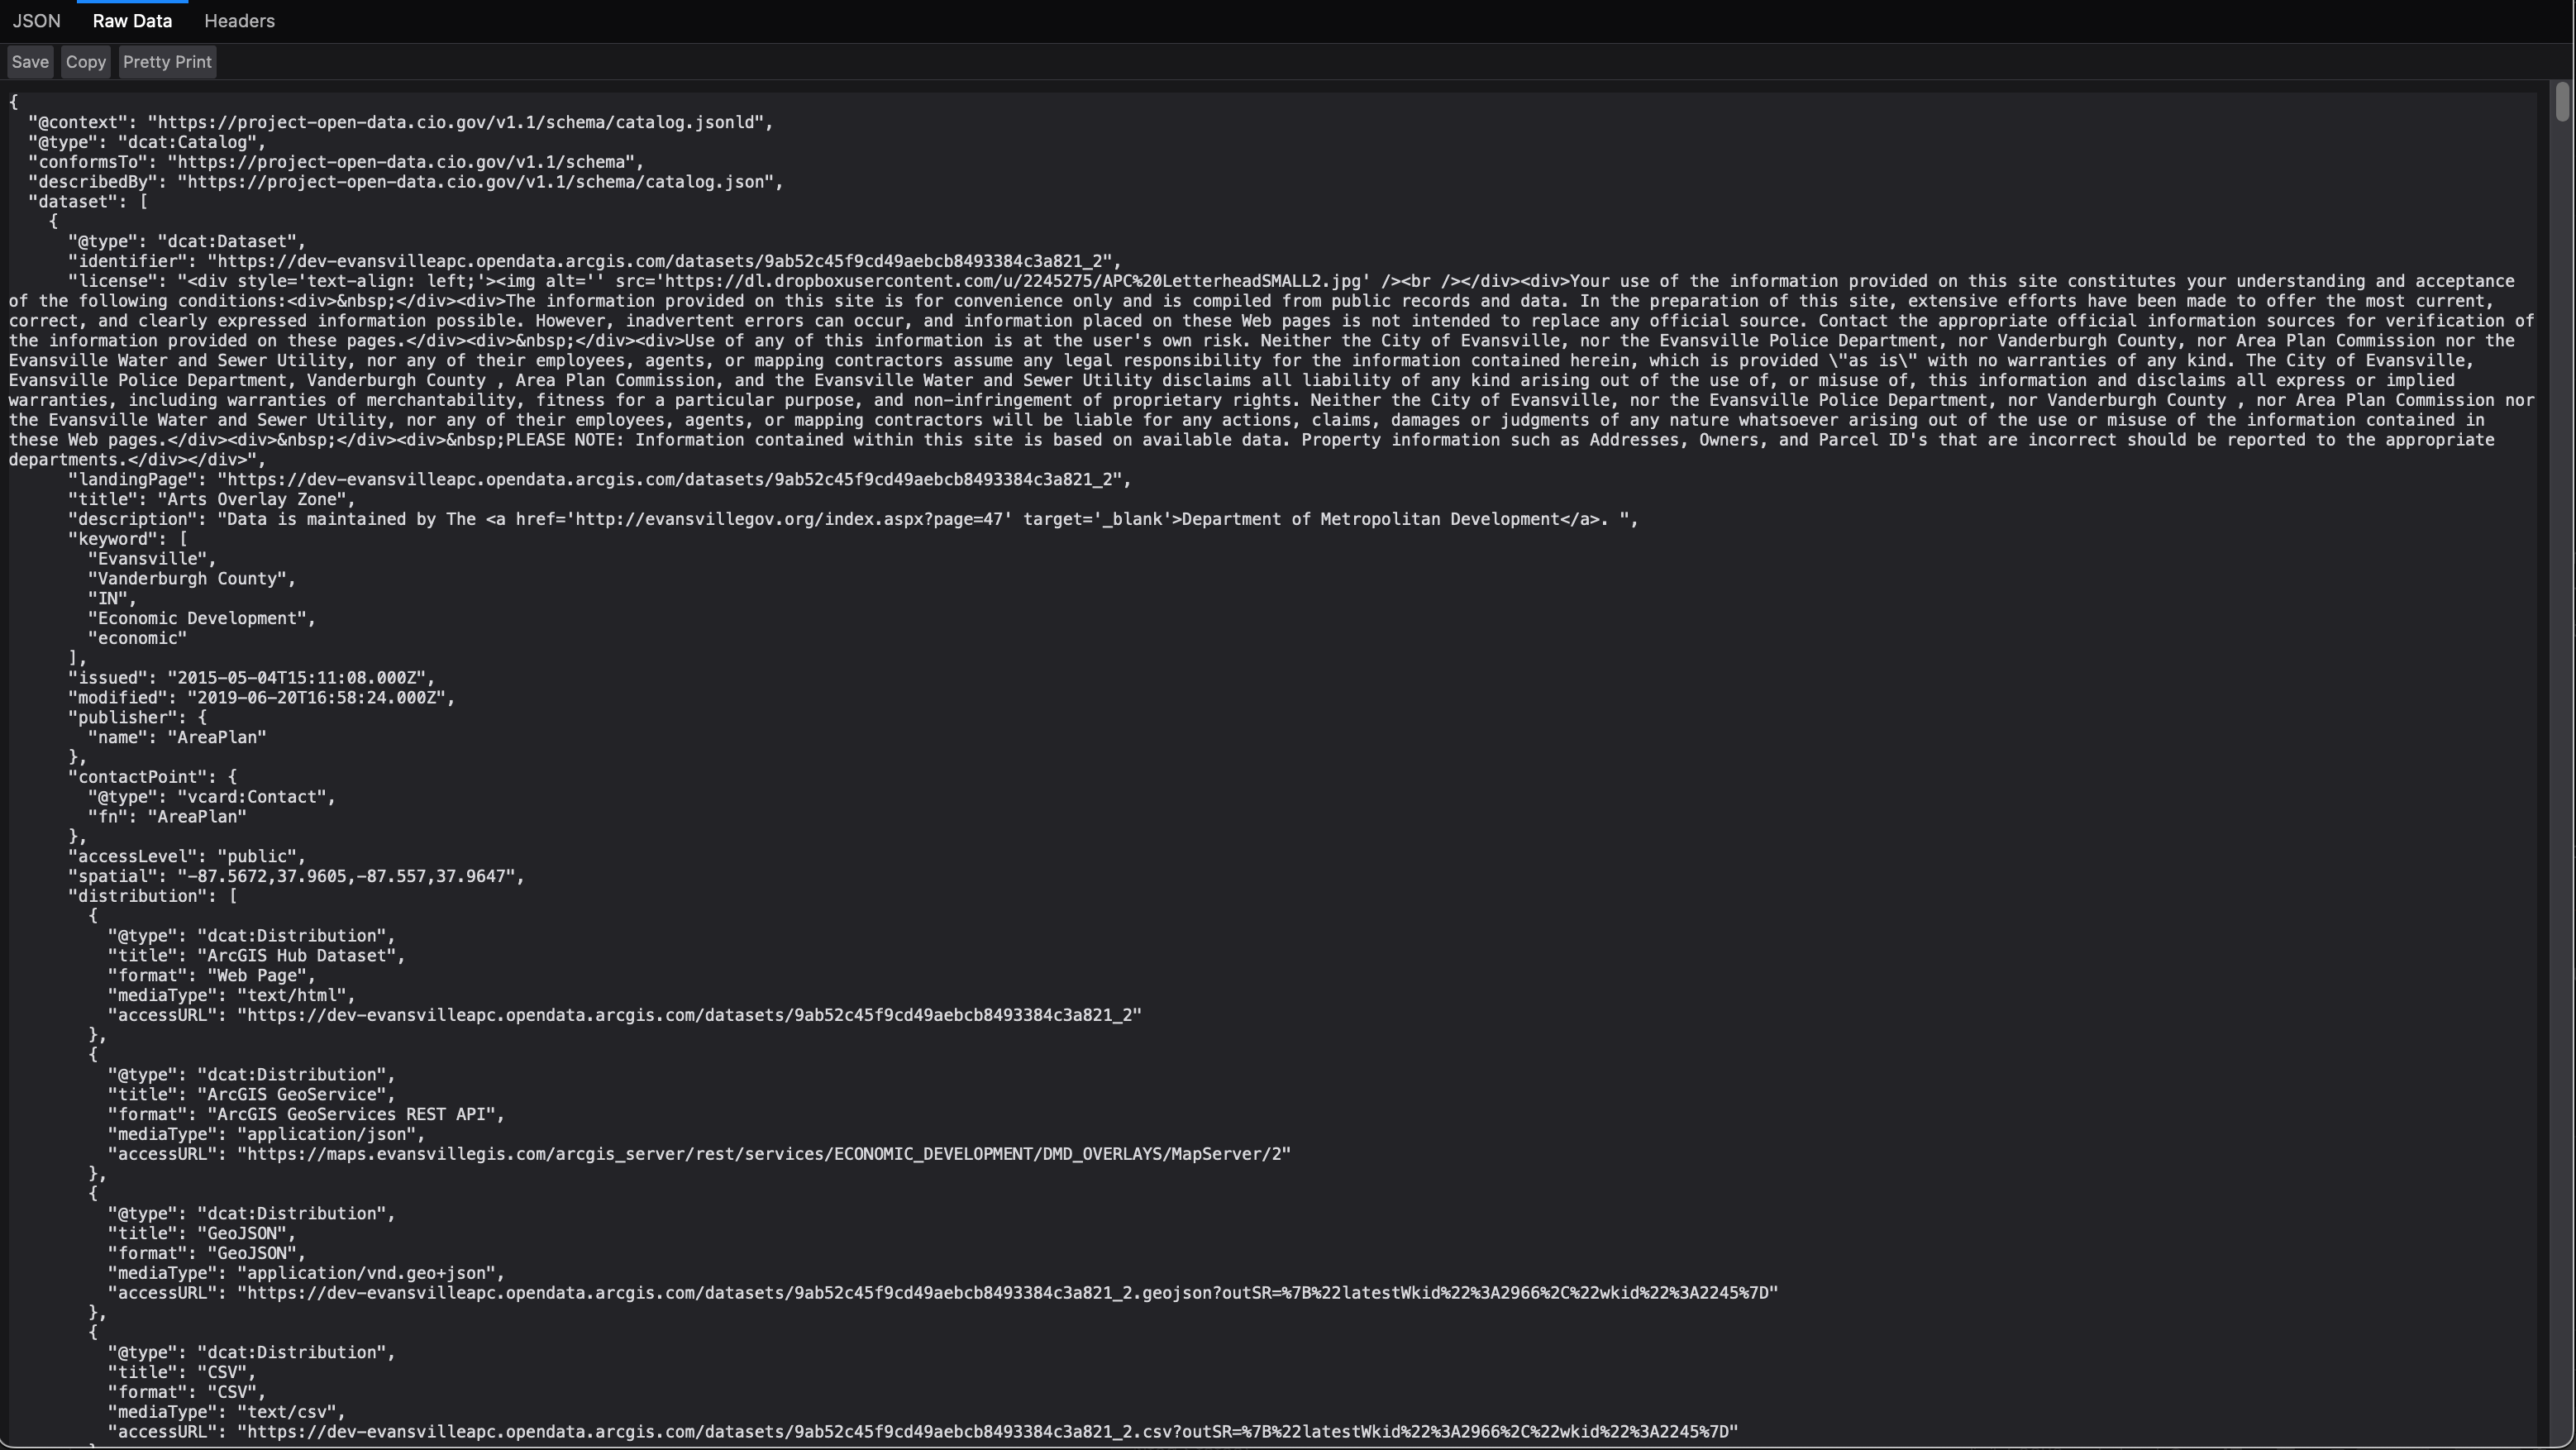

## This is the regular JSON compiled format for arrangement of web syntax in JavaScript and displayed in arrangement of specific headers in BTAA format denoted by the harvest.py script for metadata purposes.

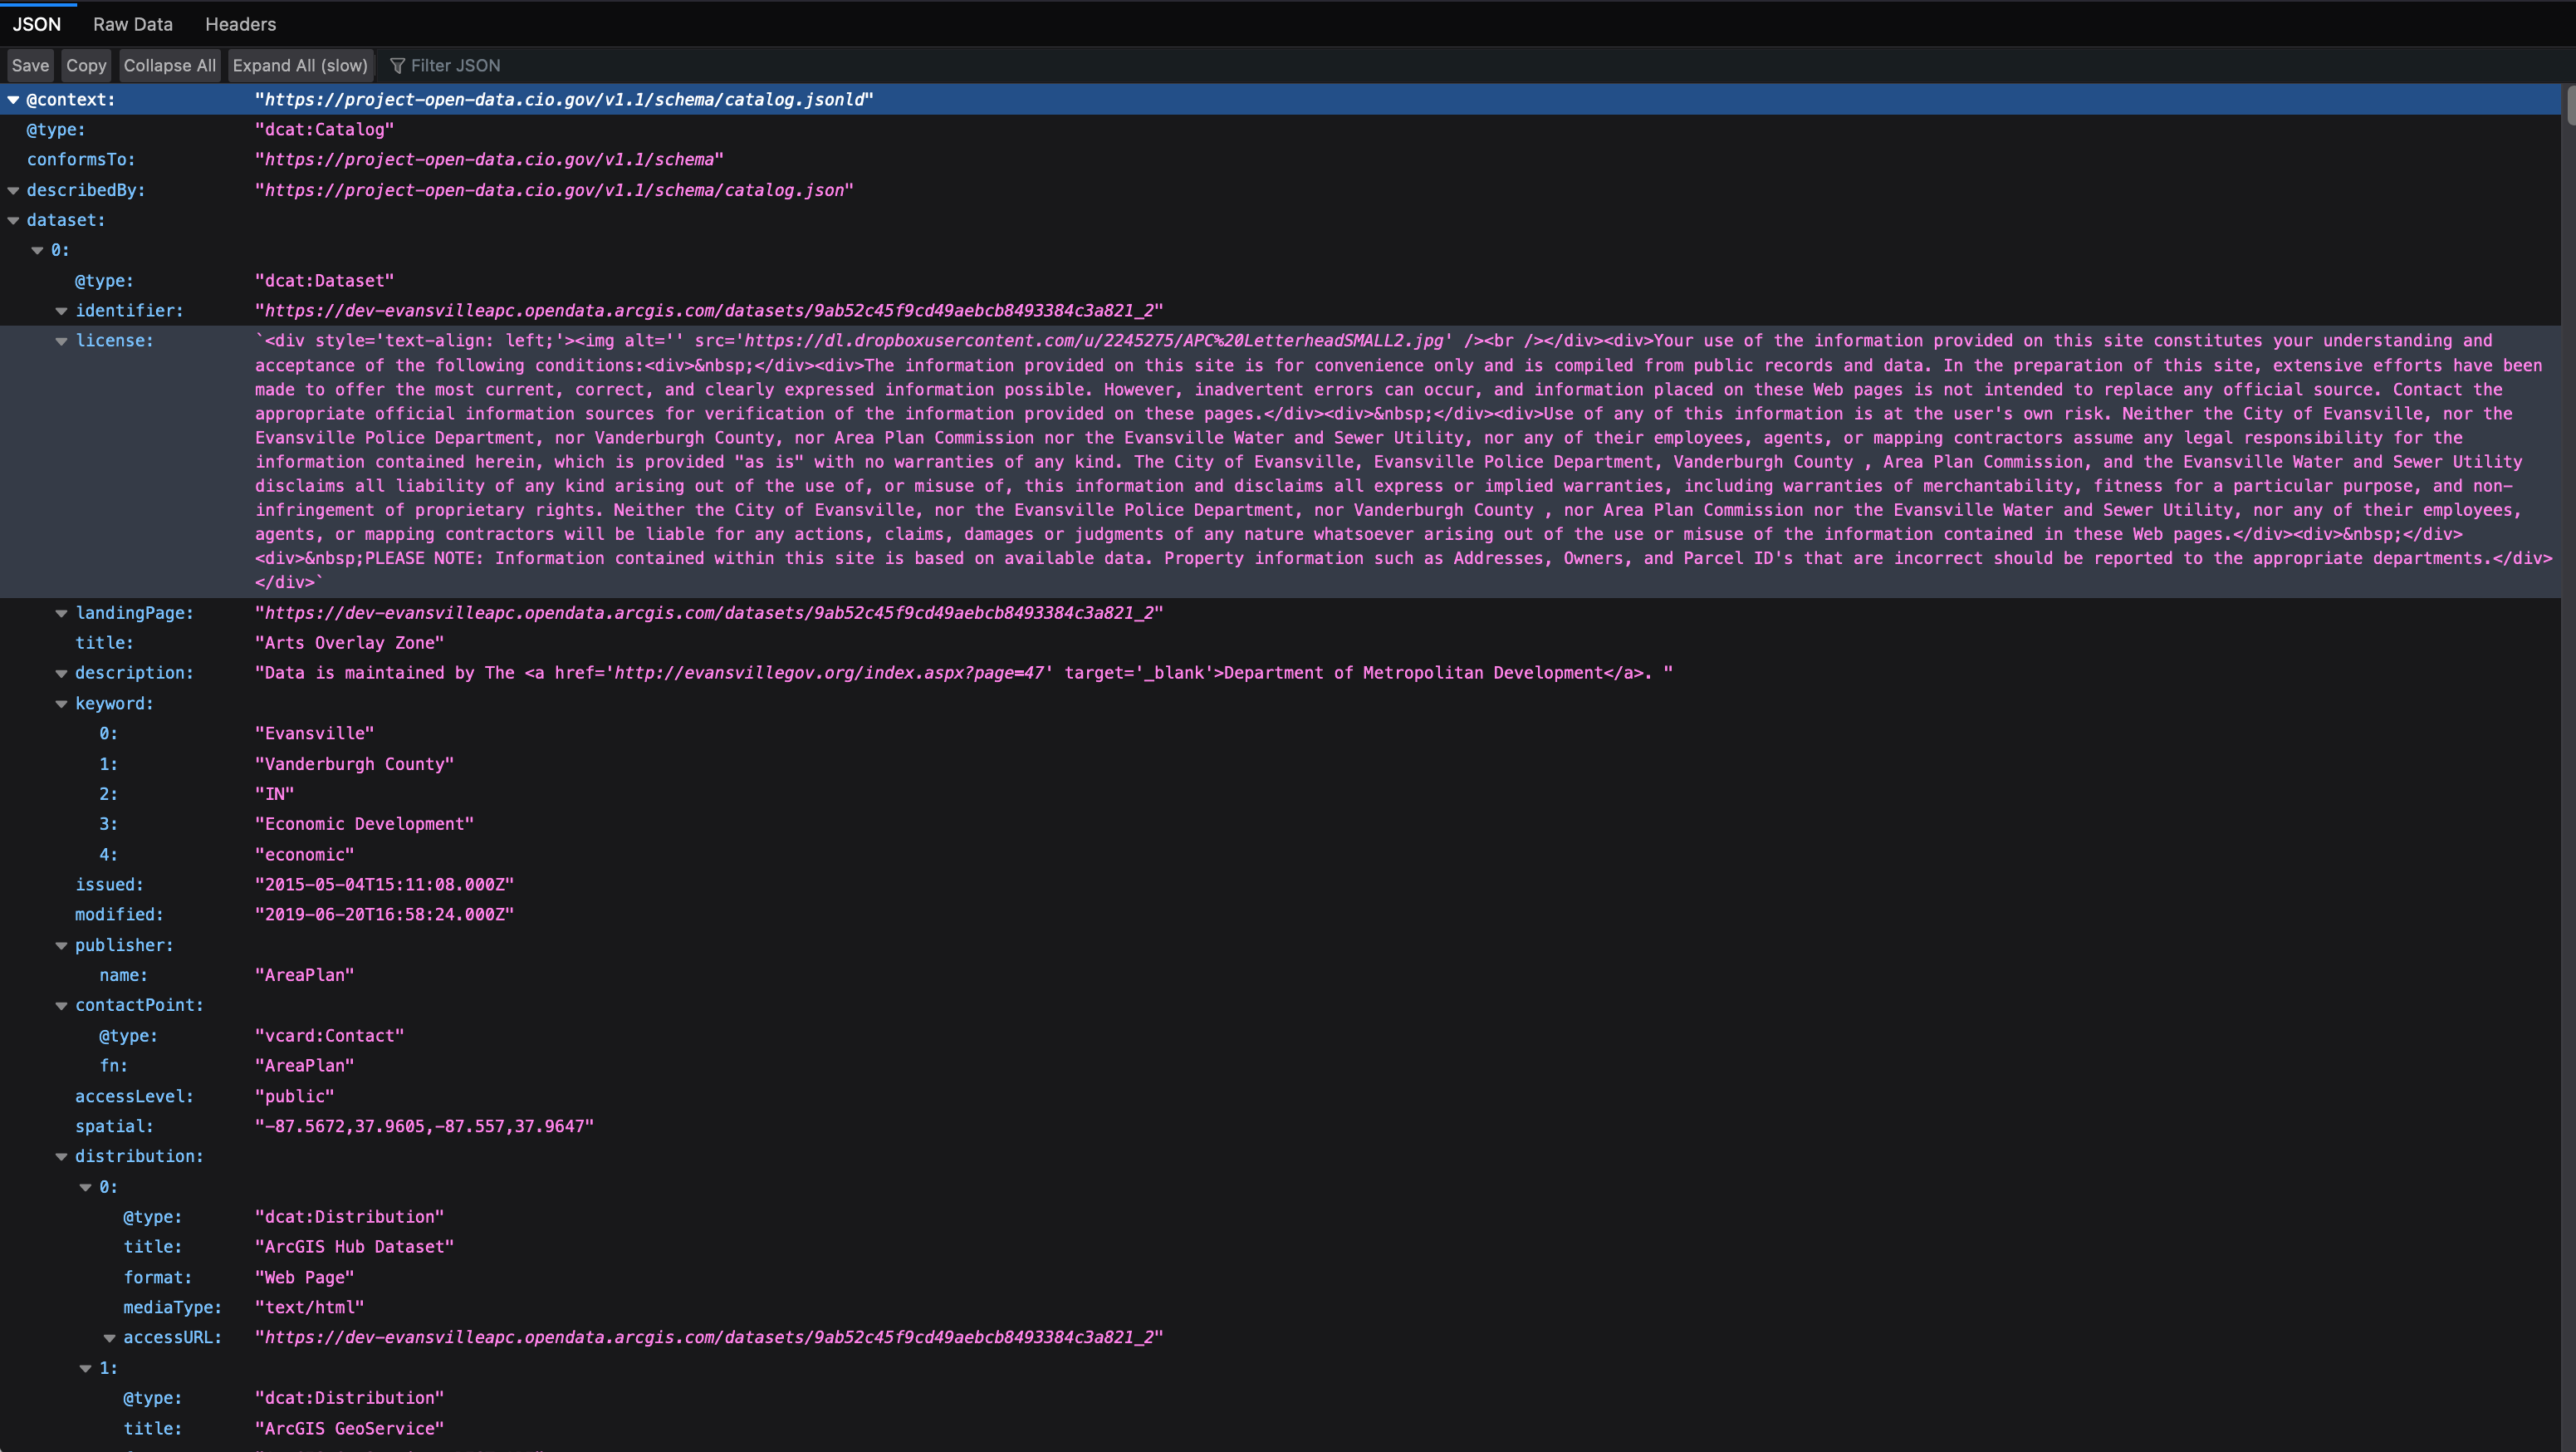

## This section will show samplings of a DCAT harvest and a breif selection of arcPortals.csv portals sampled:

## 1. Import Modules

- Import the necessary modules to operate the script from `json, csv, to urllib.request`

In [2]:
import json
import csv
import urllib.request
import os

## 2. Set Dates for Harvesting and Directory

- Set parameters for dataes of previous JSONs harested and new ones to be harvested with a file directory 

In [4]:
## Set the date download of the older and newer JSONs (yyyymmdd)
PreviousActionDate = '20171106'
ActionDate = '20230302'

# Set path for where files will be stored 
directory = r'/Users/Thenewsguy/Documents/GitHub/harvesting-guide/docs/1-Tutorials/DCAT'

## 3. Select Portal URL(s) CSV and JSON(s) Destination Location to be Read and Exported

- Simplified version of the `harvest.py` for full DCAT harvesting; see workflows/harvesting/dcat/harvest.py for full procedure.  

In [4]:
newItemDict = {}

with open('/Users/Thenewsguy/Documents/GitHub/harvesting-guide/docs/1-Tutorials/DCAT/arcPortals.csv') as f: # Reads Portal CSV by rows and columns to begin process
    reader = csv.DictReader(f)
    for row in reader:
        portalName = row['portalName']
        url = row['URL']
        print (portalName, url)
        
        oldjson = directory + '%s_%s.json' % (portalName, PreviousActionDate)
        newjson = directory + '%s_%s.json' % (portalName, ActionDate)
        
        response = urllib.request.urlopen(url) # Opens the selected portals/webpage as variable for use 
        newdata = json.load(response)

        with open(newjson, 'w') as outfile: # Opens NewJSON File and replaces oldJSON file 
            json.dump(newdata, outfile)
            
        if os.path.exists(oldjson): # Checks previous harvest with current to see if anything changed (standards, schema, etc)
            with open(oldjson) as data_file:    
                olderdata = json.load(data_file)
        else:
            print ("There is no comparison file!")
            
        older_ids = {} 
        for x in range(len(olderdata["dataset"])):
            older_ids[x] = olderdata["dataset"][x]["identifier"]

        for y in range(len(newdata["dataset"])): # Creates CSV based on parameters below to populate fields with information
            identifier = newdata["dataset"][y]["identifier"]
            if identifier not in older_ids.values():
                metadata = []
                metadata.append(portalName)
                metadata.append(identifier)
                metadata.append(newdata["dataset"][y]['title']) # Title Column
                metadata.append(newdata["dataset"][y]['description']) # Description Column
                metadata.append(newdata["dataset"][y]['issued']) # Issued Column
                metadata.append(newdata["dataset"][y]['landingPage']) # The Land Page/Web Page 
                newItemDict[identifier] = metadata # ID Column

with open(report, 'w', newline='') as outfile: # Opens newly generated report from harvested portals
    csvout = csv.writer(outfile)
    csvout.writerow(fields)
    for keys in newItemDict:
        allvalues = newItemDict[keys]
        csvout.writerow(allvalues)

01b-18163 http://dev-evansvilleapc.opendata.arcgis.com/data.json


NameError: name 'newjson' is not defined